In [202]:
import kaggle
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


In [203]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files("ahsan81/hotel-reservations-classification-dataset", unzip = True, path = ".")

Dataset URL: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset


In [234]:
df = pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [107]:
df.shape

(36275, 19)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [109]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [25]:
for feature in cat_features[1:]:
    print(df[feature].value_counts())

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


In [43]:
# Encoding based on frequency (higher frequency = cheaper, lower frequency = more expensive)
meal_plan_encoding = {
    'Not Selected': 0,  
    'Meal Plan 1': 1,  
    'Meal Plan 2': 3,  
    'Meal Plan 3': 4   
}

room_type_encoding = {
    'Room_Type 1': 1,  
    'Room_Type 2': 2,
    'Room_Type 3': 3,
    'Room_Type 4': 4,
    'Room_Type 5': 5,
    'Room_Type 6': 6,
    'Room_Type 7': 7   
}

market_segment_encoding = {
    'Online': 5,       
    'Offline': 3,
    'Corporate': 2,
    'Complementary': 1,
    'Aviation': 4     
}


In [41]:
df.groupby(["market_segment_type"])["avg_price_per_room"].agg([np.median, np.std]).sort_values(by='median', ascending=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7668\606006793.py:1: FutureWarning: The provided callable <function median at 0x0000028DB655E2A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby(["market_segment_type"])["avg_price_per_room"].agg([np.median, np.std]).sort_values(by='median', ascending=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7668\606006793.py:1: FutureWarning: The provided callable <function std at 0x0000028DB63F6A20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby(["market_segment_type"])["avg_price_per_room"].agg([np.median, np.std]).sort_values(by='median', ascending=True)


,median,std
market_segment_type,,
Complementary,0.0,15.512972
Corporate,79.0,23.690001
Offline,90.0,24.995597
Aviation,95.0,8.538361
Online,107.1,35.220319


In [236]:
df = df.drop("Booking_ID", axis = 1)

In [161]:
def encoder(X, market_segment_encoding, room_type_encoding, meal_plan_encoding):
    print("Columns in X:", X.columns)  # Debugging print to check the columns of X

    df_copy = X.copy()
    # Apply the encoding
    df_copy['type_of_meal_plan_encoded'] = df_copy['type_of_meal_plan'].map(meal_plan_encoding)
    df_copy['room_type_reserved_encoded'] = df_copy['room_type_reserved'].map(room_type_encoding)
    df_copy['market_segment_type_encoded'] = df_copy['market_segment_type'].map(market_segment_encoding)
    # Return the required columns as a NumPy array
    return df_copy[['type_of_meal_plan_encoded', 'room_type_reserved_encoded', 'market_segment_type_encoded']].values


In [162]:
encoder(df, market_segment_encoding, room_type_encoding, meal_plan_encoding)

Columns in X: Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


array([[1, 1, 3],
       [0, 1, 5],
       [1, 1, 5],
       ...,
       [1, 1, 5],
       [0, 1, 5],
       [1, 1, 3]], shape=(36275, 3))

In [119]:
from sklearn.preprocessing import FunctionTransformer

# Wrap the encoder function with FunctionTransformer
encoder_transformer = FunctionTransformer(
    func=encoder,
    kw_args={
        'market_segment_encoding': market_segment_encoding,
        'room_type_encoding': room_type_encoding,
        'meal_plan_encoding': meal_plan_encoding
    }
)

In [189]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [207]:
df["total_stay_night"] = df["no_of_weekend_nights"] + df["no_of_week_nights"]
df["percent_cancel"] = df['no_of_previous_cancellations'] / (df['no_of_previous_cancellations']+ df['no_of_previous_bookings_not_canceled'])

In [208]:
df.drop(columns = ["no_of_weekend_nights", "no_of_week_nights", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled"], inplace= True)

In [237]:
num_features = df.select_dtypes(include = np.number).columns
cat_features = df.select_dtypes(exclude = np.number).columns

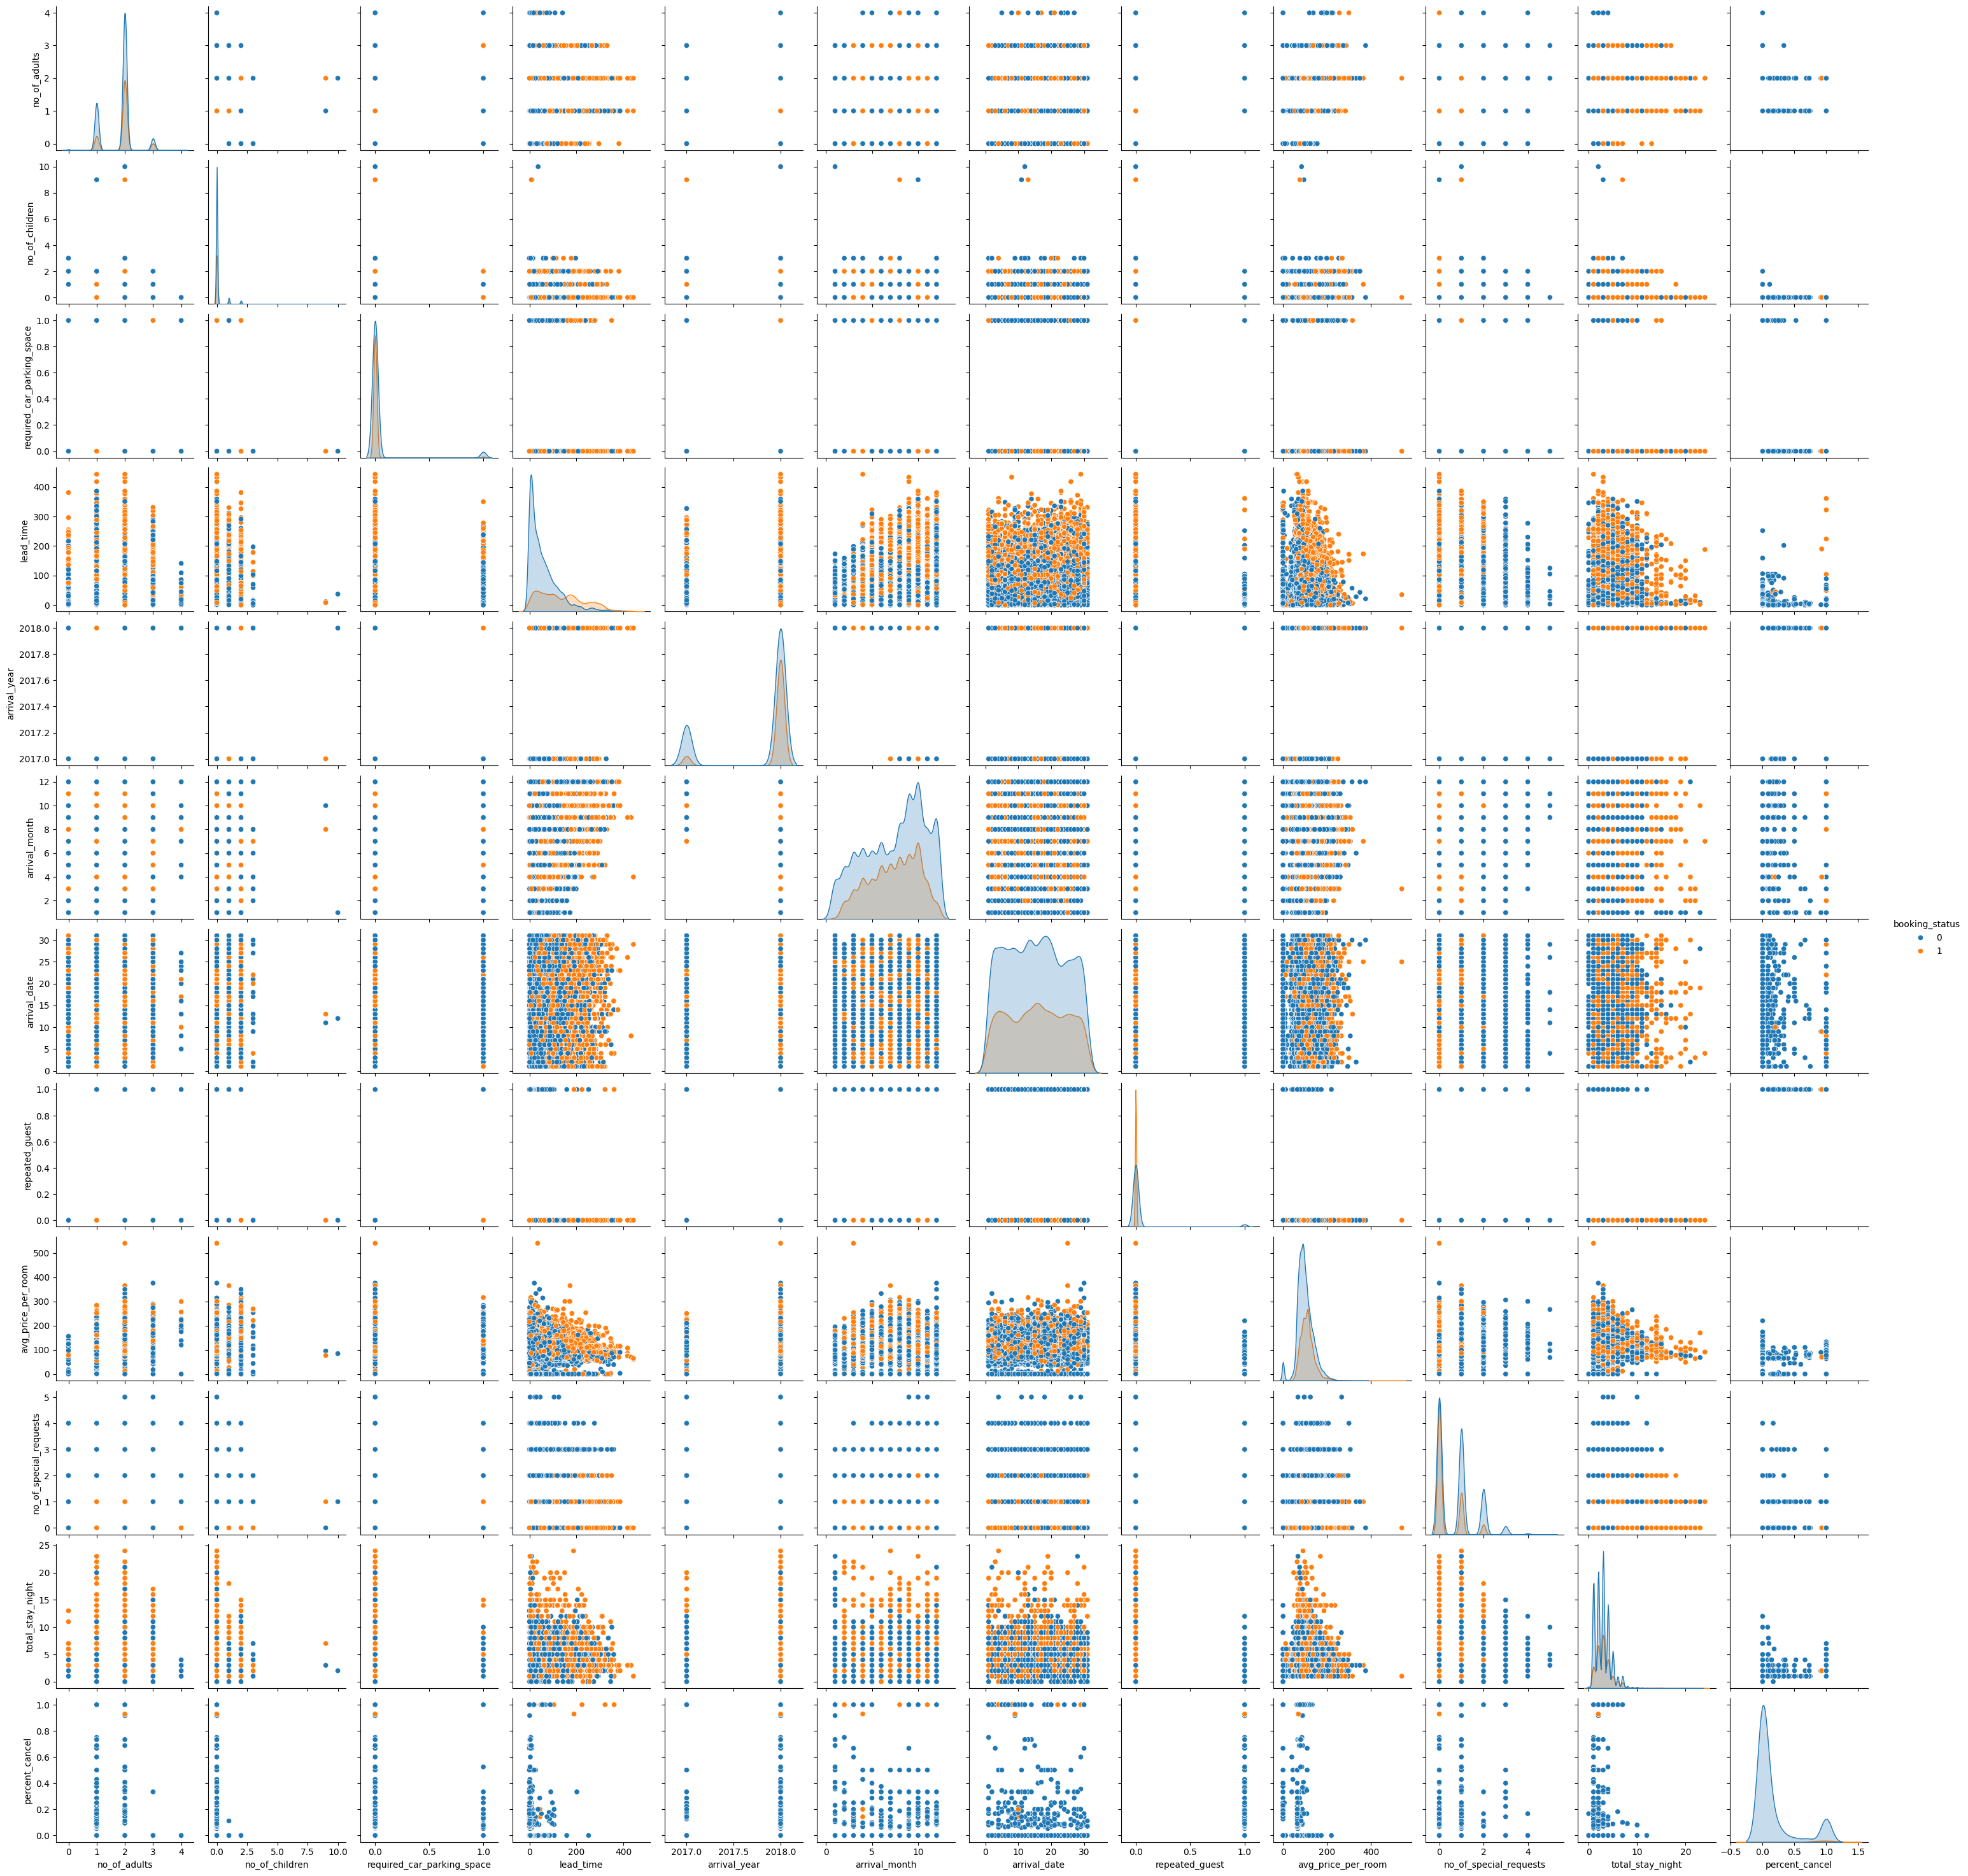

In [228]:
sns.pairplot(df,hue="booking_status")

In [238]:

from sklearn.preprocessing import OneHotEncoder
# Numeric pipeline
numeric_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy= "median")), 
    ("scaler", MinMaxScaler())
])

# Categorical pipeline
# Categorical pipeline with LabelEncoder
categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values
    ("onehot", OneHotEncoder(handle_unknown='ignore'))  # Custom LabelEncoder
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_features),
        ('cat', categorical_pipeline, cat_features[1:-1])
    ])

In [188]:
cat_features[1:-1]

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object')

In [211]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['no_of_adults', 'no_of_children', 'required_car_parking_space',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'repeated_guest', 'avg_price_per_room', 'no_of_special_requests',
       'total_stay_night', 'percent_cancel'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['room_type_reserved', 'market_segment_type'], dtype='object'))])

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [239]:
x = df.drop(columns = "booking_status")
y = df["booking_status"]

In [241]:
y.replace({"Not_Canceled" : 0, "Canceled" : 1}, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_7668\2793689512.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace({"Not_Canceled" : 0, "Canceled" : 1}, inplace = True)


In [242]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [245]:
randFor_model = RandomForestClassifier(random_state= 42)
randForPipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', randFor_model)
])

In [158]:
y

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

In [269]:
randForPipeline.fit(X_train, y_train)

2025/01/19 07:32:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cc730b52255848498f1853566bf39e6d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/01/19 07:32:15 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\user\Desktop\Mlflow_Proj\mlflow_env\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_...previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['room_type_reserved', 'market_segment_type'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

2025/01/19 08:49:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\user\Desktop\Mlflow_Proj\mlflow_env\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


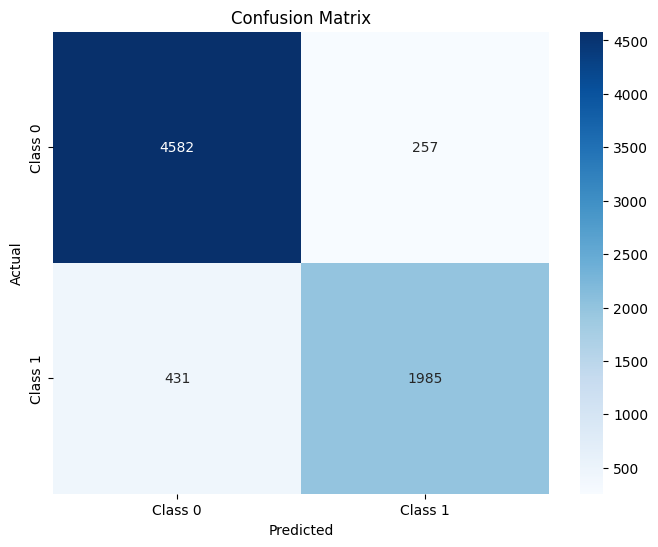

Confusion Matrix:
[[4582  257]
 [ 431 1985]]


In [326]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
y_pred_randFor = randForPipeline.predict(X_test)

# Calculate the confusion matrix
cmRandFor = confusion_matrix(y_test, y_pred_randFor)

# Plot the confusion matrix using Seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cmRandFor, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cmRandFor)


In [250]:
from sklearn.metrics import classification_report

# Generate the classification report
reportRandFor = classification_report(y_test, y_pred_randFor, target_names=['Class 0', 'Class 1'], output_dict= True)

# Print the classification report
print("Classification Report:")
print(reportRandFor)


Classification Report:
{'Class 0': {'precision': 0.9140235387991222, 'recall': 0.9468898532754702, 'f1-score': 0.9301664636622006, 'support': 4839.0}, 'Class 1': {'precision': 0.8853702051739518, 'recall': 0.8216059602649006, 'f1-score': 0.8522971232288535, 'support': 2416.0}, 'accuracy': 0.9051688490696072, 'macro avg': {'precision': 0.899696871986537, 'recall': 0.8842479067701854, 'f1-score': 0.891231793445527, 'support': 7255.0}, 'weighted avg': {'precision': 0.904481642997825, 'recall': 0.9051688490696072, 'f1-score': 0.9042350609761954, 'support': 7255.0}}


In [347]:
from sklearn.metrics import precision_recall_curve
def plot_Roc(y_actual, y_pred) : 
    precision, recall, thresholds = precision_recall_curve(y_actual, y_pred)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.savefig('precision_recall.png')

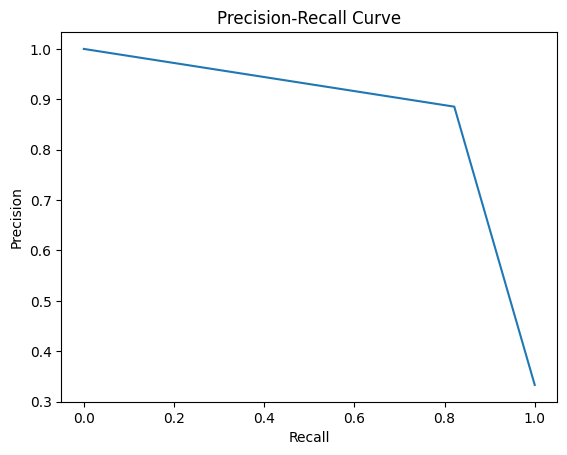

In [348]:
plot_Roc(y_test, y_pred_randFor)

In [282]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
reg_model = LogisticRegression(random_state=42)
regPipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', reg_model)
])

In [283]:
regPipeline.fit(X_train, y_train)

2025/01/19 07:49:02 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'add847960a8f4a05a70cb03294aa63d9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/01/19 07:49:02 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\user\Desktop\Mlflow_Proj\mlflow_env\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_..._of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['room_type_reserved', 'market_segment_type'], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

2025/01/19 09:34:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\user\Desktop\Mlflow_Proj\mlflow_env\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


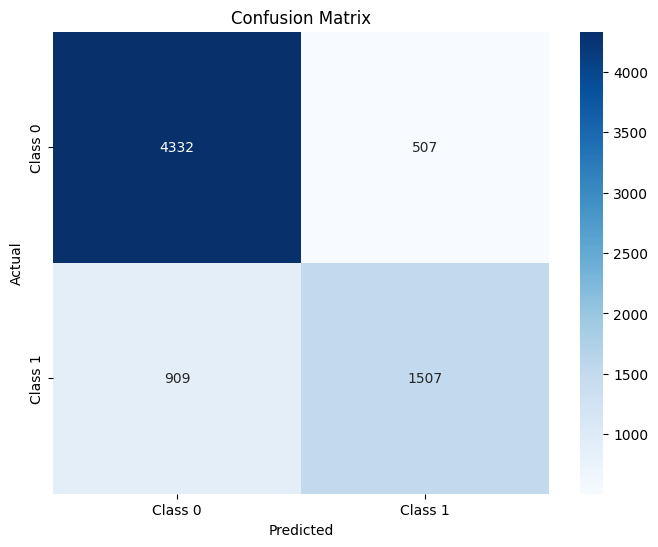

Confusion Matrix:
[[4332  507]
 [ 909 1507]]


In [349]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
y_pred_reg = regPipeline.predict(X_test)

# Calculate the confusion matrix
cm_reg = confusion_matrix(y_test, y_pred_reg)

# Plot the confusion matrix using Seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_reg)


In [292]:
from sklearn.metrics import classification_report

# Generate the classification report
reg_report = classification_report(y_test, y_pred_reg, target_names=['Class 0', 'Class 1'], output_dict= True)

# Print the classification report
print("Classification Report:")
print(reg_report)

Classification Report:
{'Class 0': {'precision': 0.8265598168288495, 'recall': 0.8952262864228147, 'f1-score': 0.8595238095238096, 'support': 4839.0}, 'Class 1': {'precision': 0.7482621648460774, 'recall': 0.6237582781456954, 'f1-score': 0.6803611738148985, 'support': 2416.0}, 'accuracy': 0.8048242591316334, 'macro avg': {'precision': 0.7874109908374635, 'recall': 0.759492282284255, 'f1-score': 0.769942491669354, 'support': 7255.0}, 'weighted avg': {'precision': 0.800485781378763, 'recall': 0.8048242591316334, 'f1-score': 0.7998605527529303, 'support': 7255.0}}


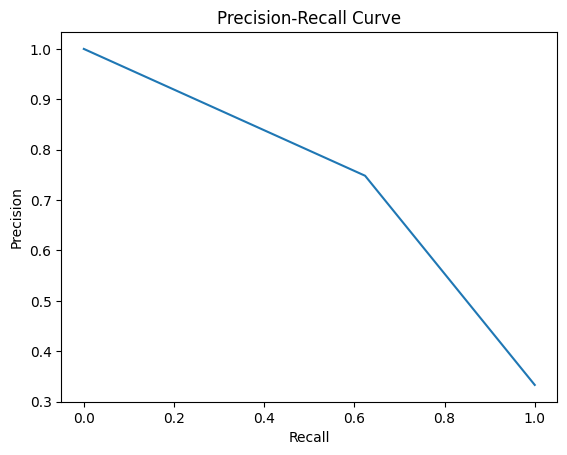

In [350]:
plot_Roc(y_test, y_pred_reg)

In [382]:
from sklearn.svm import SVC

# Support Vector Machine (SVM) Model
svm_model = SVC(random_state=42)

# Create the full pipeline with preprocessing and model
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', svm_model)
])



In [383]:
# Train the model
svm_pipeline.fit(X_train, y_train)


2025/01/19 10:16:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '55c443bd76eb4938bb3c975dfdcb3f1c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/01/19 10:16:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\user\Desktop\Mlflow_Proj\mlflow_env\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_...cellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['room_type_reserved', 'market_segment_type'], dtype='object'))])),
                ('classifier', SVC(random_state=42))])

In [384]:
# Make predictions on the test set
y_pred_svm = svm_pipeline.predict(X_test)

# Evaluate the model: Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Classification Report
print("\nClassification Report:")
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
print(svm_report)

2025/01/19 10:20:47 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\user\Desktop\Mlflow_Proj\mlflow_env\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Confusion Matrix:
[[4408  431]
 [ 865 1551]]

Classification Report:
{'0': {'precision': 0.8359567608571971, 'recall': 0.9109320107460219, 'f1-score': 0.8718354430379747, 'support': 4839.0}, '1': {'precision': 0.7825428859737639, 'recall': 0.6419701986754967, 'f1-score': 0.7053206002728513, 'support': 2416.0}, 'accuracy': 0.8213645761543763, 'macro avg': {'precision': 0.8092498234154805, 'recall': 0.7764511047107593, 'f1-score': 0.788578021655413, 'support': 7255.0}, 'weighted avg': {'precision': 0.8181693147209634, 'recall': 0.8213645761543763, 'f1-score': 0.816384049499651, 'support': 7255.0}}


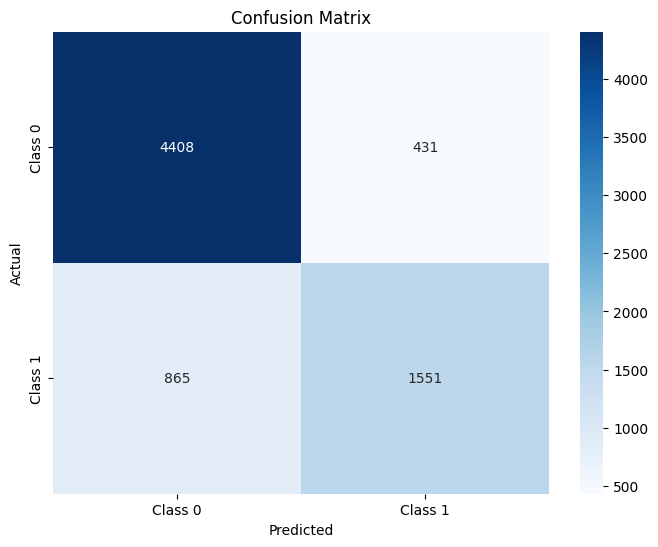

Confusion Matrix:
[[4408  431]
 [ 865 1551]]


In [385]:
# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix using Seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_svm)


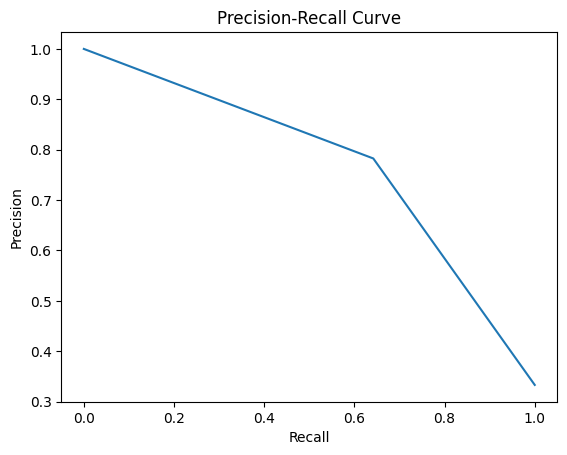

In [386]:
plot_Roc(y_test, y_pred_svm)   


# Using MLflow

In [229]:
import mlflow

In [231]:
# experiment for models
exp1_name = "ChangeModels"
mlflow.set_experiment(exp1_name)



2025/01/18 22:05:33 INFO mlflow.tracking.fluent: Experiment with name 'ChangeDate' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/user/Desktop/Mlflow_Proj/mlruns/316399453706358411', creation_time=1737227133719, experiment_id='316399453706358411', last_update_time=1737227133719, lifecycle_stage='active', name='ChangeDate', tags={}>

In [232]:
# Get on experimemt
exp1, exp2 = mlflow.get_experiment_by_name(exp1_name)  
exp1_id= exp1.experiment_id

In [395]:

# first run of model experiment
with mlflow.start_run(run_name= "RanForestwithDefault", experiment_id= exp1_id):
    # Add metrics
    mlflow.log_metrics(reportRandFor['Class 0'])
    mlflow.log_metric("Accuracy", reportRandFor['accuracy'])
    # Add paras
    default_params = randForPipeline["classifier"].get_params()
    mlflow.log_params(default_params)
    # Add artifact 
    mlflow.log_artifacts(local_dir= r"run_artifacts\forestArt", artifact_path= "forestArt")
    



In [396]:

# second run of model experiment
with mlflow.start_run(run_name= "LogRegwithDefault", experiment_id= exp1_id):
    # Add metrics
    mlflow.log_metrics(reg_report['Class 0'])
    mlflow.log_metric("Accuracy", reg_report['accuracy'])
    # Add paras
    default_params = regPipeline["classifier"].get_params()
    mlflow.log_params(default_params)
    # Add Artifact 
    mlflow.log_artifacts(local_dir= r"run_artifacts\logRegArt" , artifact_path= "logRegArt")
   

In [397]:

# Third run of model experiment
with mlflow.start_run(run_name= "SVMwithDefault", experiment_id= exp1_id):
    # Add metrics
    mlflow.log_metrics(svm_report['0'])
    mlflow.log_metric("Accuracy", svm_report['accuracy'])
    # Add paras
    default_params = svm_pipeline["classifier"].get_params()
    mlflow.log_params(default_params)
    # Add Artifact 
    mlflow.log_artifacts(local_dir= r"run_artifacts\xgboostArt", artifact_path= "xgboostArt")
   

2025/01/19 10:11:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\user\Desktop\Mlflow_Proj\mlflow_env\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/19 10:11:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\user\Desktop\Mlflow_Proj\m

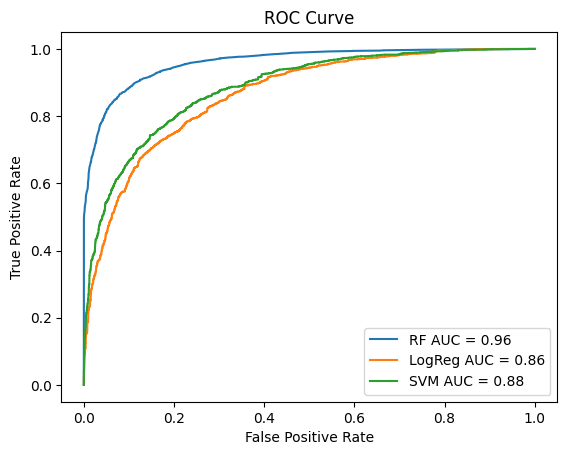

In [373]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_rf = randForPipeline.predict_proba(X_test)[:, 1]  
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label=f'RF AUC = {auc_rf:.2f}')

y_pred_prob_logreg = regPipeline.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.plot(fpr_logreg, tpr_logreg, label=f'LogReg AUC = {auc_logreg:.2f}')

y_pred_prob_svm = svm_pipeline.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC = {auc_svm:.2f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')


In [390]:
rf_model, logreg_model, svm_model = randForPipeline["classifier"], regPipeline["classifier"], svm_pipeline["classifier"]

In [391]:
import joblib

joblib.dump(rf_model, 'run_artifacts/forestArt/rf_model.pkl')
joblib.dump(logreg_model, 'run_artifacts/logRegArt/logreg_model.pkl')
joblib.dump(svm_model, 'run_artifacts/xgboostArt.pkl')


['run_artifacts/xgboostArt.pkl']